# Joukowski Transform

From the assignment 6 of our lesson that, we can see that a circle in the z=x+iy plane can be transform to an airfoil shape in the $\xi$ plane where $\xi=z+(c/z)$, c usually is regarded as 1.


In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from IPython.display import Image

## 1.  How does Joukowski transformation transforms?

I have to say that it is really shocking to me that we can use an equation as simple as  $\xi = z + 1/z$ to get an airfoil, so the first question is that, dow does Joukowski Transformation transforms the whole coordinate system? 

Well I believe it won't be too hard to calculate the transform progress by hand ,the picture below is the 

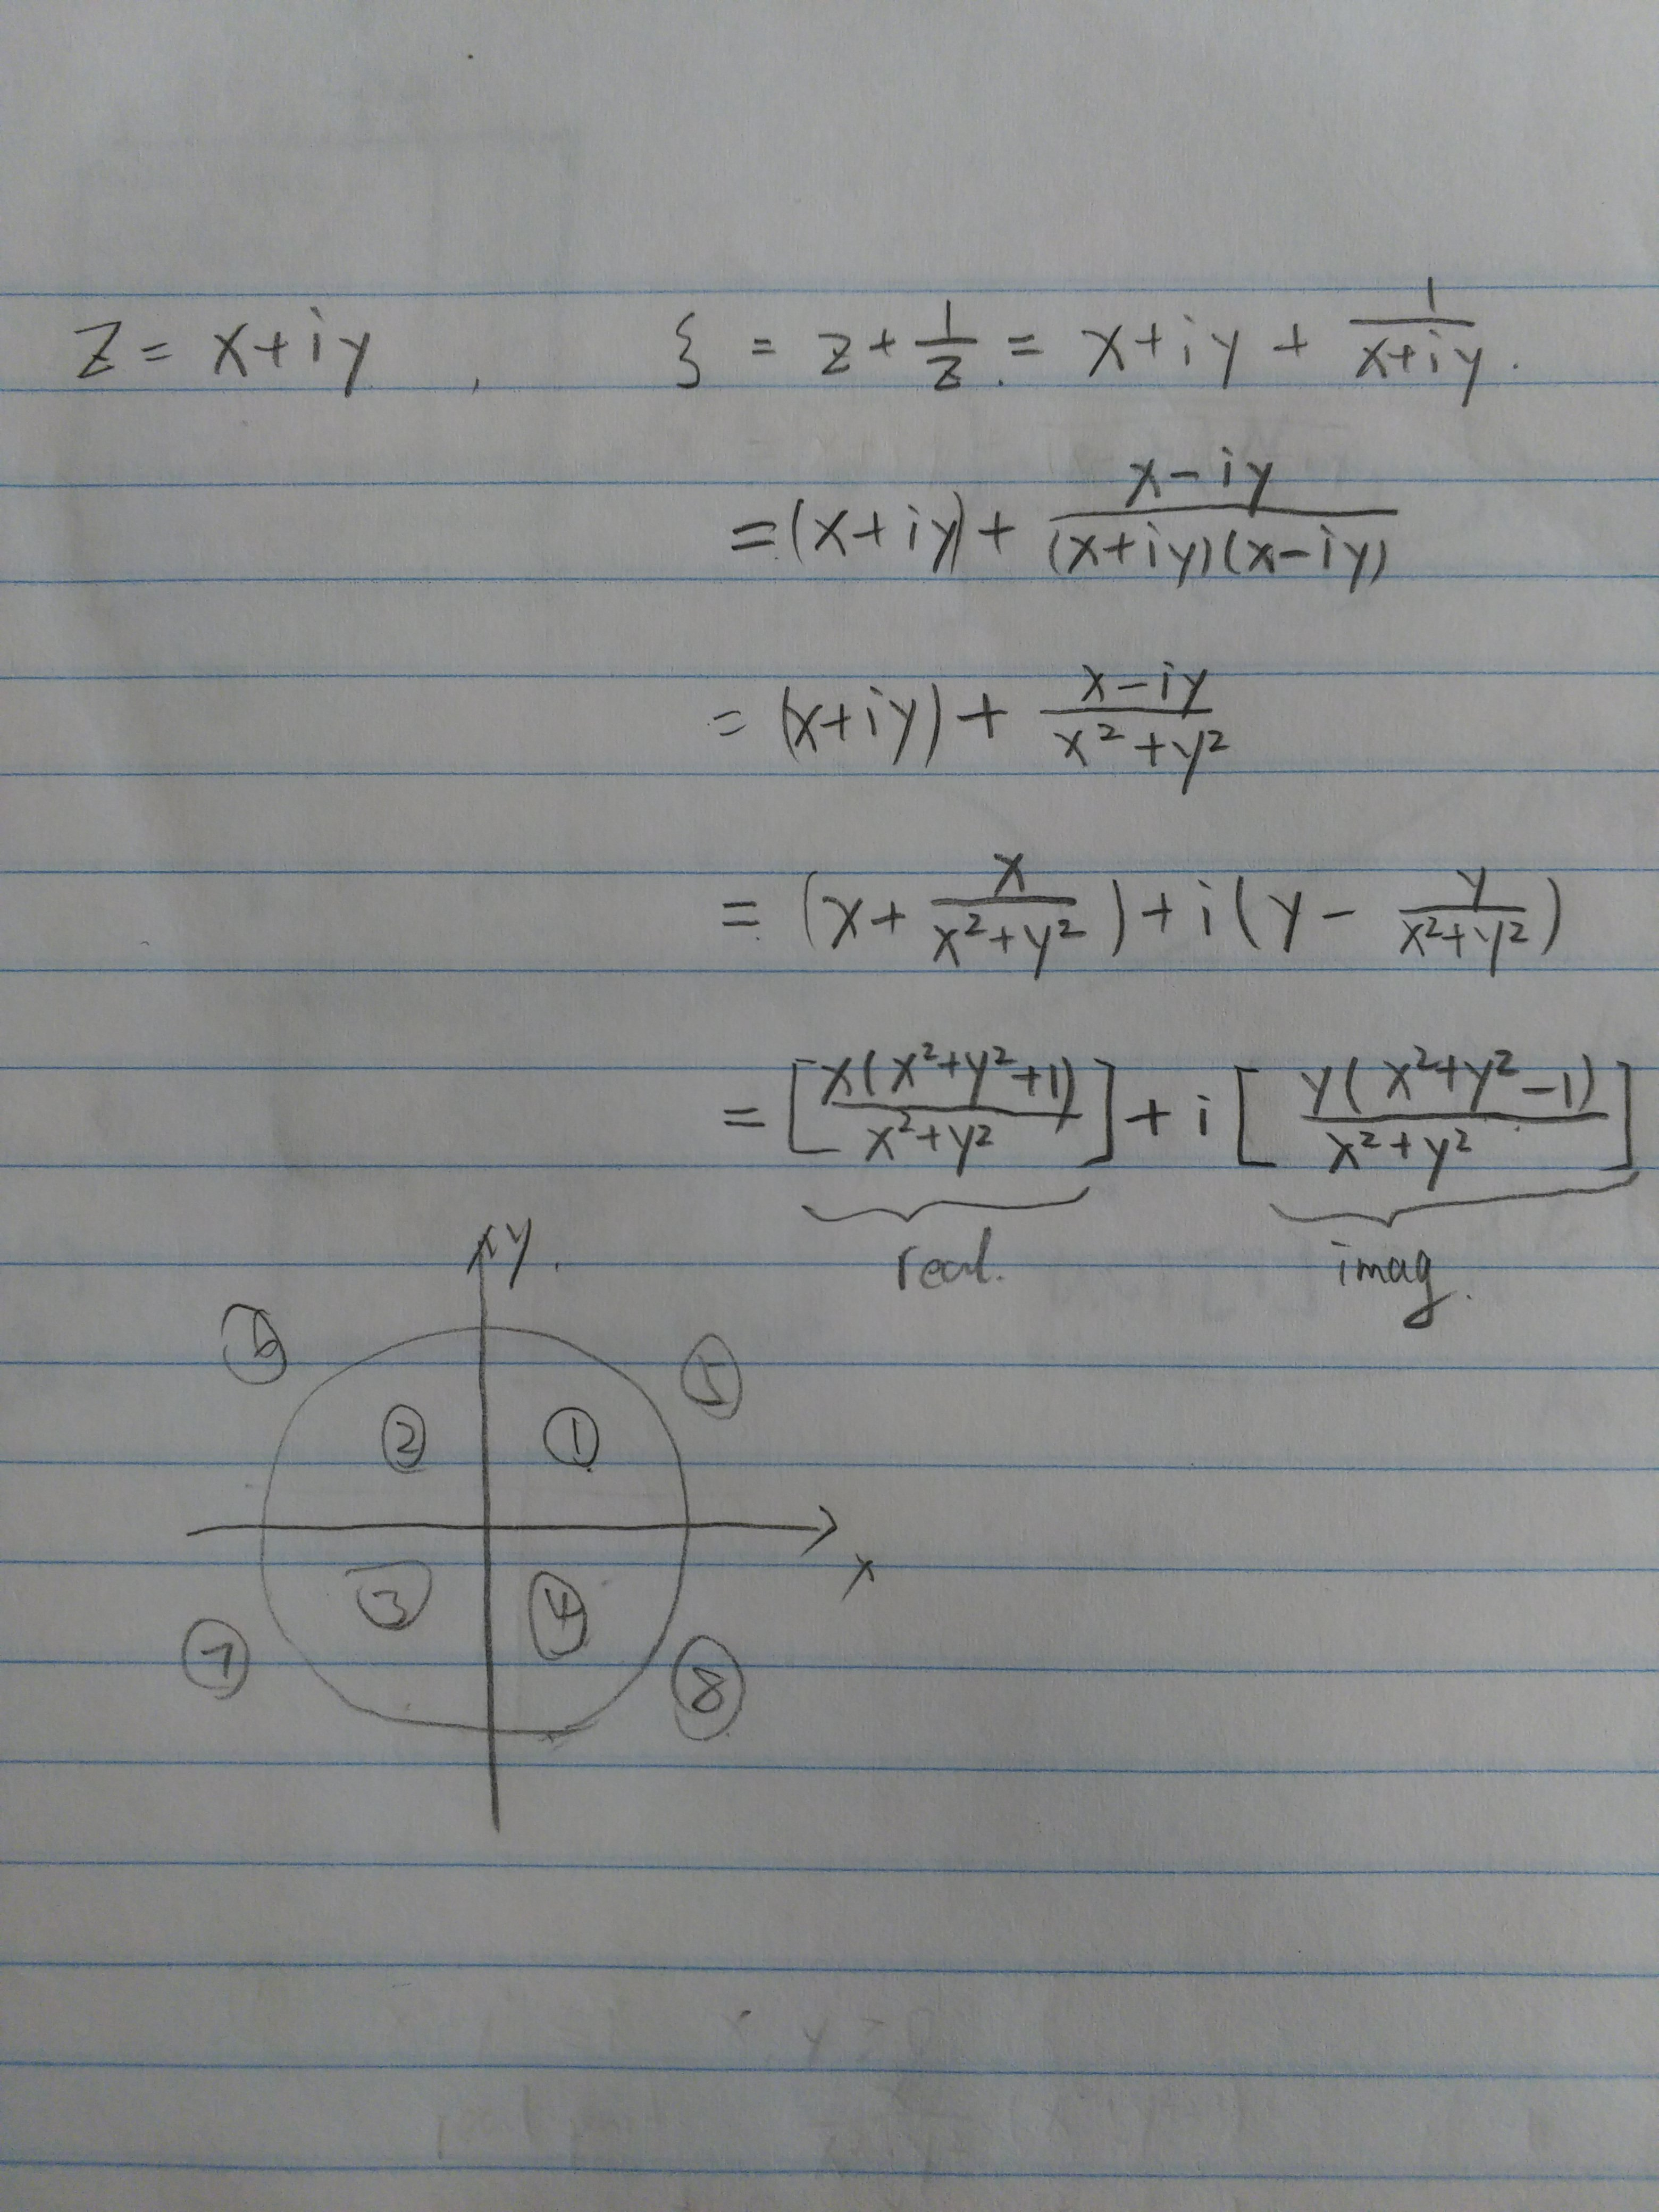

In [2]:
Image('./1.jpg', width=400,height=400)

From the above we can see that the transform result has very large relationship between $ x^2 + y^2$ and $ 1 $, which is clearly made the whole plane into 8 areas as shown above. the  first  4 region has formed a circle centered at origin with radius 1, the 5 to 8 region was the region except the first 4 region. So we will start from here,plot the result of the whole plane's transform piece by piece!

In [3]:
#define the Joukowski transformation

def j_trans(z,c):
    """
    Joukowski transfer:
    z_trans = z + (c**2)/z
    Parameters:
    
    z: the number you want to do Joukowski transfer, it can be a complex number or an array
    c: the constant in the Joukowski transfer
    ---
    Return:
    
    j_trans: the transfer result
    """
    j_trans = z + c**2/z
    return j_trans

We are going to define a function to plot the result because we will use them 8 times!

In [4]:
def plot_transform_result(angle1,angle2,r_start,r_end):
    theta=numpy.linspace(angle1,angle2,10)
    r=numpy.linspace(r_start,r_end,10)
    R,THETA=numpy.meshgrid(r,theta)
    x=R*numpy.cos(THETA)
    y=R*numpy.sin(THETA)
    
    z=x+1j*y
    z_trans=j_trans(z,1)
    z_trans_real=z_trans.real
    z_trans_imag=z_trans.imag
    
    pyplot.figure(figsize=[5,5])
    pyplot.scatter(z_trans_real,z_trans_imag,color='b',s=5)
    pyplot.scatter(x,y,color='r',s=5)
    pyplot.xlim(-10,10)
    pyplot.ylim(-10,10)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


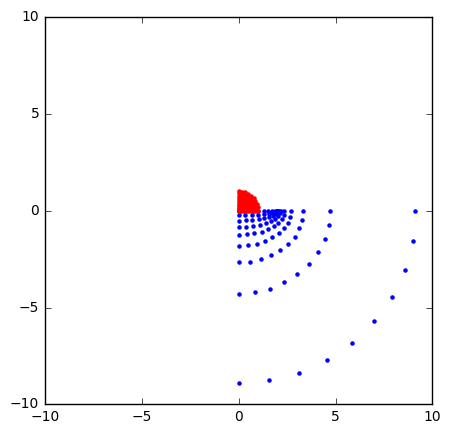

In [5]:
plot_transform_result(0,0.5*math.pi,0,1)

The red area is region 1 in the previous image, and the blue dot is the result of the transformation. 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


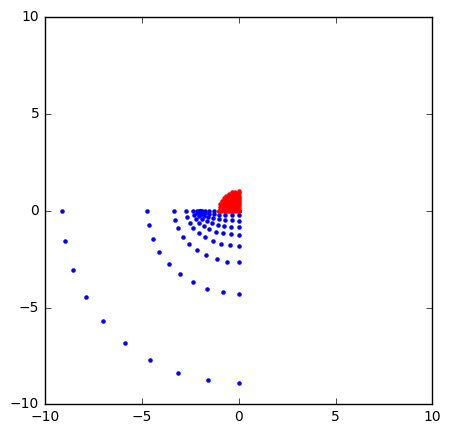

In [6]:
plot_transform_result(0.5*math.pi, math.pi,0,1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


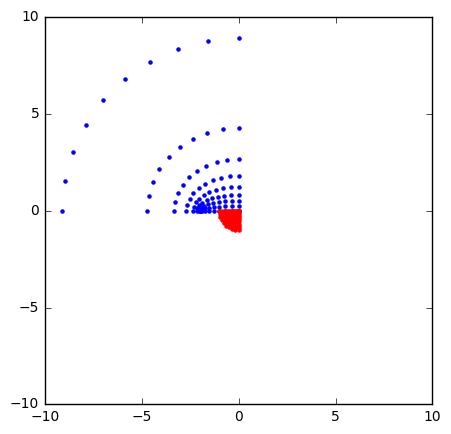

In [7]:
plot_transform_result(math.pi, 1.5*math.pi, 0, 1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


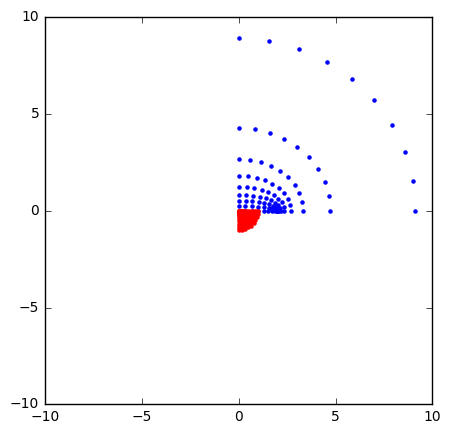

In [8]:
plot_transform_result(1.5*math.pi, 2*math.pi, 0, 1)

The region 1 to 4 has changed quite alot:

1,The Y coordinate changed the sign from positive to negetive or from negetive to positive. 

2, Before the transform, they were inside the circle with redius 1, but after the transform, they were spread from 0 to positive infinite or negetive infinite

3, Before the transform, points were located more close to the origin, but after the transformation, points were located more closer to the point (1,0) or (-1,0).

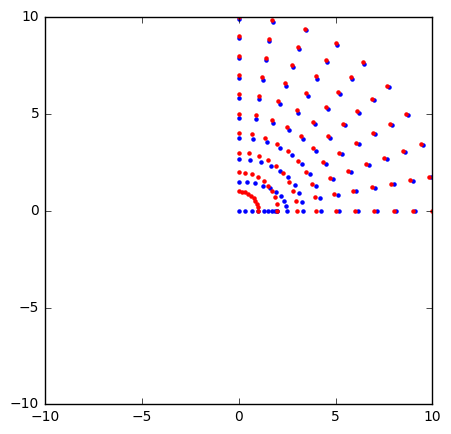

In [9]:
plot_transform_result(0,0.5*math.pi,1,10)

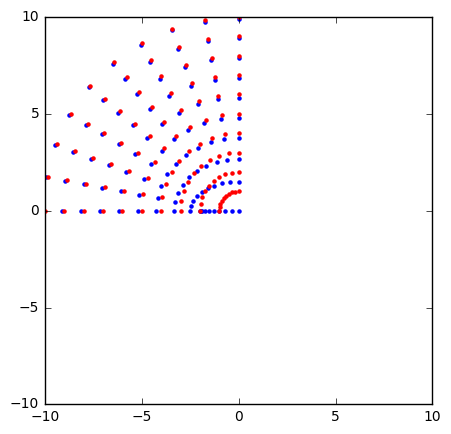

In [10]:
plot_transform_result(0.5*math.pi,math.pi,1,10)

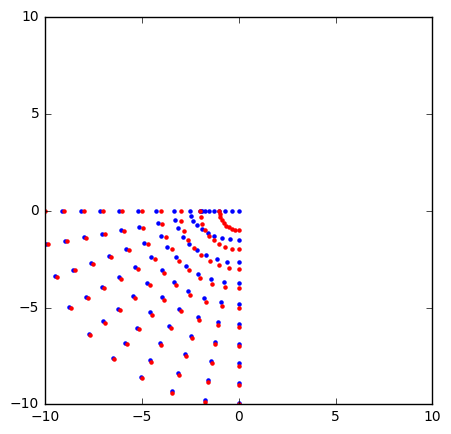

In [11]:
plot_transform_result(math.pi, 1.5*math.pi,1,10)

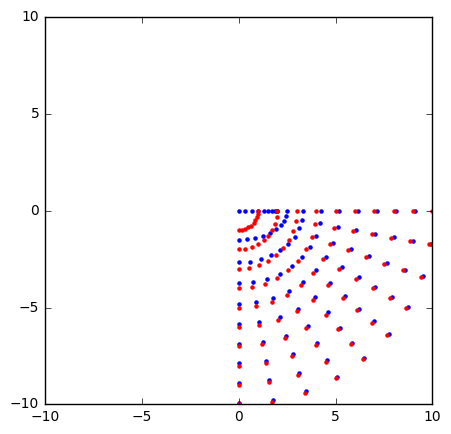

In [12]:
plot_transform_result(1.5*math.pi,2*math.pi,1,10)

The region 5 to 8 changed not as much as region 1 to 4:

1, the sign of y coordinate was not changed.

2, the y coordinates tends to be shorter after  the transform, while the x coordinate remains the same, and the change is larger with smaller absolute value of y coordinate.

---

## 2. How circles do the Joukowski transform

First of all, since we will use lots of circles, let's build a function to generate circles!

In [13]:
#generate circles
def generate_circle(x_c,y_c,r):
    theta=numpy.linspace(0,2*math.pi,40)
    x_circle=x_c+r*numpy.cos(theta)
    y_circle=y_c+r*numpy.sin(theta)
    return x_circle,y_circle

Then let's start with the three examples that we used in the assignment 6: the first one is centered atthe origin with radius $1.5$. The second one is centered at $(-0.2,0)$ with radius $1.2$. The third one is centered at $(-0.1,0.1)$ with radius $\sqrt{ 1.1^2+0.1^2}$. Let's plot the circle and the transformed result together on the same picture to see the result!

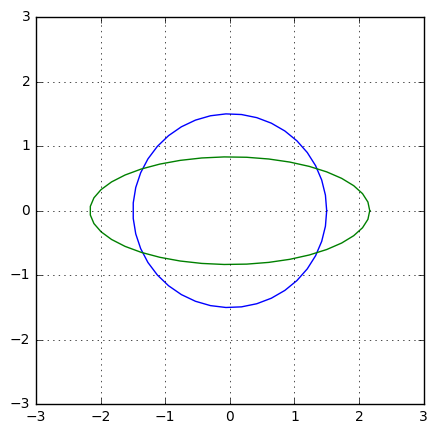

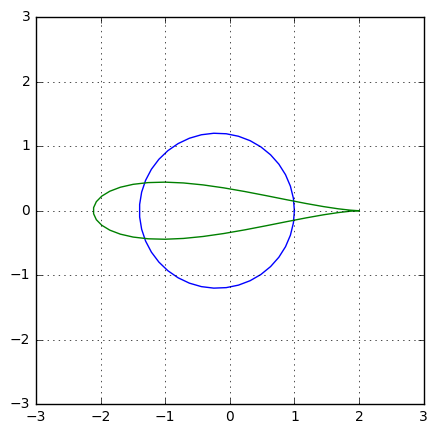

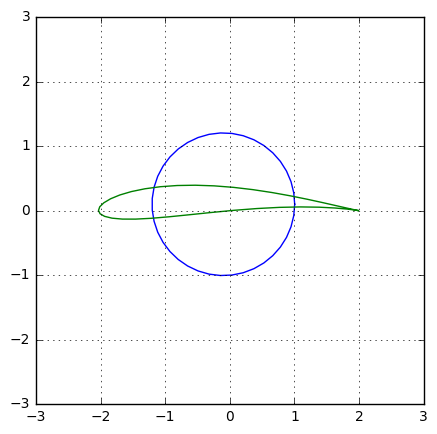

In [14]:
##Three cases in Assignment 6

#First one, centered at (0,0),radius 1.5
x,y=generate_circle(0,0,1.5)
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

#second, centered at(-0.2,0), radius 1.2
x,y=generate_circle(-0.2,0,1.2)
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

#third, centered at (-0.1,0.1), radius (1.22)**0.5
x,y=generate_circle(-0.1,0.1,(1.22)**0.5)
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

The three examples used in assignment 6 has different radius, different $x$ coordinate and $y$ coordinate of the center, and only the second and the third case has a sharp trailing edge, the only common of the second and the third circle is that they all intersects the point $(1,0)$. according to Wikipedia, it is nessasary to intersects the point $(1,0)$ to form a sharp edge, next we will try if the circle don't intersect the point $(1,0)$. we will keep the radius and $y$ coordinates the same as the second case, and change the $x$ coordinate only.

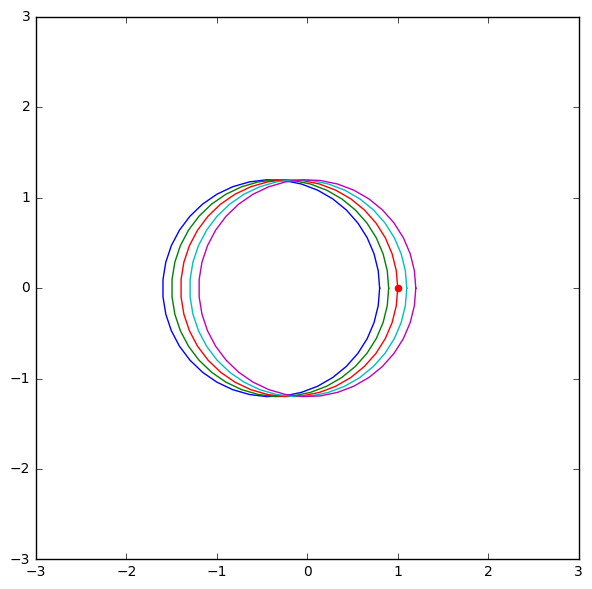

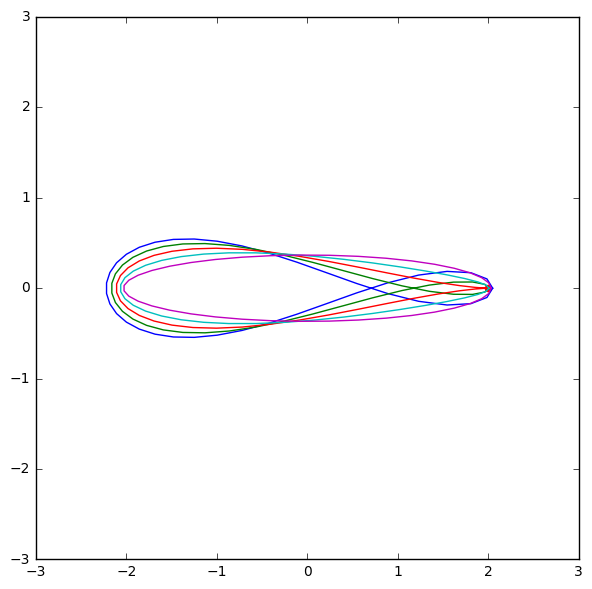

In [15]:
x_c=numpy.linspace(-0.4,0,5)
y_c=numpy.zeros_like(x_c)

x_coordinates=numpy.zeros([5,40])
y_coordinates=numpy.zeros([5,40])
for i in range(len(y_c)):
    x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],1.2)


pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):    
    pyplot.plot(x_coordinates[i],y_coordinates[i])
pyplot.scatter(1,0,color='r')

pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):
    z=x_coordinates[i]+1j*y_coordinates[i]
    z_trans=j_trans(z,1)
    pyplot.plot(z_trans.real,z_trans.imag)
pyplot.scatter(2,0,color='r')

The figure above includes five circles, centered at$ -0.4$(blue), $-0.3$(green), $-0.2$(red), $-0.1$(light blue), $0$(purple). All with radius of $1.2$, and their transform result, it shows that only the one centered at $-0.2$(the red line) turns to the shape of an airfoil, circles centered at $-0.4$ and $-0.3$ turns to be a shape of "8", and circles centered at $-0.1$ and $0$,their trailing edge is not sharp, the shape is more close to an ellipse. 

So we can make conclusion that:

1. If the circle overlaps the point$(1,0)$, the transform result won't form a sharp trailing edge, the shape is shaped like an $0$, but with the left side thicker and right side thinner

2. If the circle intersects the point $(1,0)$, the transform result will have a sharp trailing edge

3. If the circle is seperated with the point $(1,0)$, the result will form a shape of "8"

4. All circles are symmetric up and down. By comparing with the three examples in the assignment 6, we can tell that if the circle is centered at the $x$ axis, then the airfoil will be symmetric!

5. Circles which have larger distance from their origin to the point $(1,0)$ tends to have larger thickness of the airfoil.

Next we are going to try with the same value of x coordinates, different value of y coordinate of the center point of the circle, and all circles intersects with the point (1,0), that means it will have different radius as well.

we will use circles related to the third case in assignment 6, eg, all center of the circle has x coordinates -0.5,with slightly change the y coordinates and radius to keep the circle intersects (1,0)

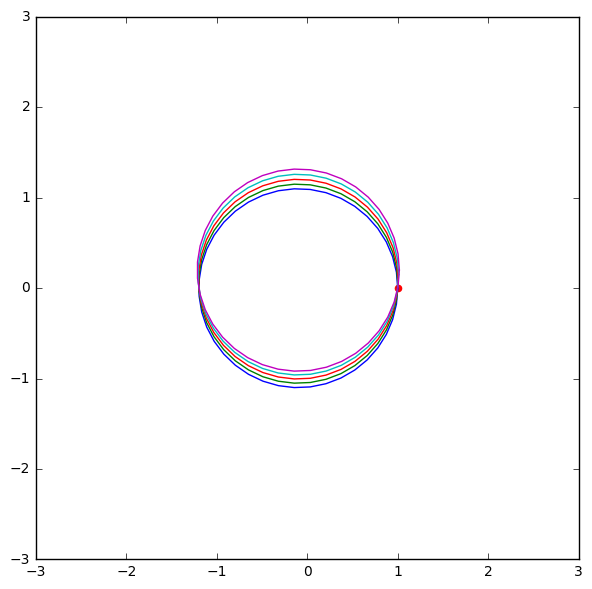

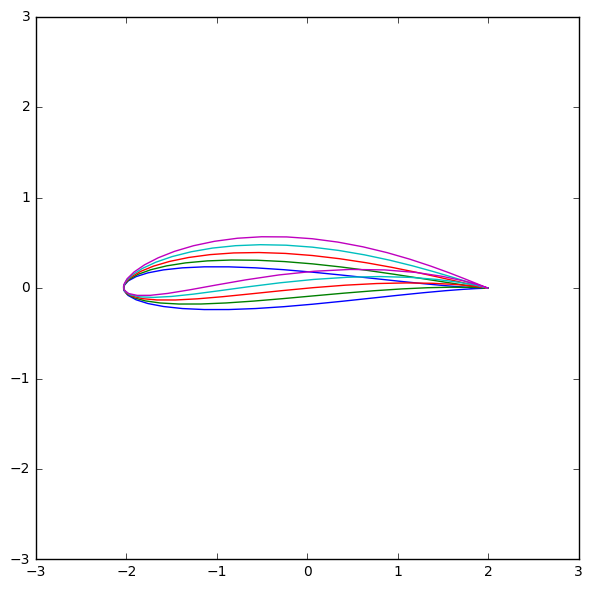

In [16]:
x_c=numpy.linspace(-0.1,-0.1,5)
y_c=numpy.linspace(0,0.2,5)
r=numpy.array([1.1,(0.05**2+1.1**2)**0.5,(0.1**2+1.1**2)**0.5,(0.15**2+1.1**2)**0.5,(0.2**2+1.1**2)**0.5])

x_coordinates=numpy.zeros([5,40])
y_coordinates=numpy.zeros([5,40])
for i in range(len(y_c)):
    x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],r[i])


pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(1,0,s=20,color='r')
for i in range(5):    
    pyplot.plot(x_coordinates[i],y_coordinates[i])
######################
pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):
    z=x_coordinates[i]+1j*y_coordinates[i]
    z_trans=j_trans(z,1)
    pyplot.plot(z_trans.real,z_trans.imag)

The circle centered at $(-0.1,0)$(blue)has a symmetricshape of airfoil, which matches the conclusion we got previously, but other circles were not symmetric anymore, and when the $y$ coordinate increases, the arc of the airfoil increases as well.

Interestingly, circles not only intersects with the point $(1,0)$, but also intersects the point $(-1.2,0)$, and after the transform, they all have the same value of the $x$ coordinate of the leading edge.combined with the conclusion we had previously, we can tell that the other point that intersects the $x$ axis is the leading edge, and the arc above the $x$ axis will becoming the upper surface of the airfoil while the arc below the $x$ axis will form the lower surface of the airfoil.

### conclusion

1. Circles in the original plane has to intersect with the point$(1,0)$, if the point $(1,0)$ is inside the circle, the transform result is like an o-shape, if the point is outside the circle, the result is like an 8-shape
2. The other point that the circle intersects with the x axis will form the leading edge
3. With the same value of $x$ coordinate, the larger the $y$ coordinate is, themore arc the airfoil will have.


## 3. How about the lift?

The next problem that we are going to consider is the lift, it's a problem that cannot be avoid. And if we follow the steps of the assignment 6, we will soon meet a very familiar problem: Kutta condition!

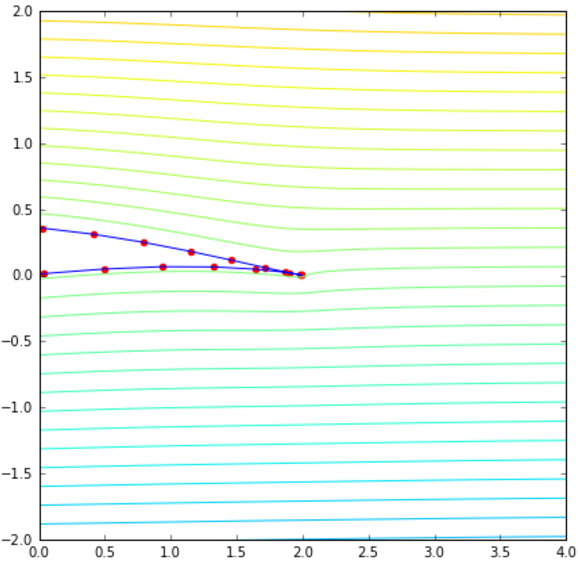

In [17]:
Image('./2.png',width=400,height=400)

This is the streamline of the third example in the assignment 6 (center at $(-0.1,0.1)$, with radius $\sqrt{1.22}$), It's quite obvious that the streamline pattern is not right, the Kutta condition has to be considered. But How?

Well, from the previous plots, we know that if we have a flow over a cylinder, the stagnation point is at the red point in the figure below. However, in a Joukowski airfoil, the stagnation is at $(1,0)$, and it's the green dot in the figure below. and it is obvious that we need to add a vortex to change the stagnation point from the RED dot to the GREEN dot! and it is not difficult to calculate the corresponding angle (between the red line and the green line) 

$$sin(\theta)=\frac{y_\center}{R}$$

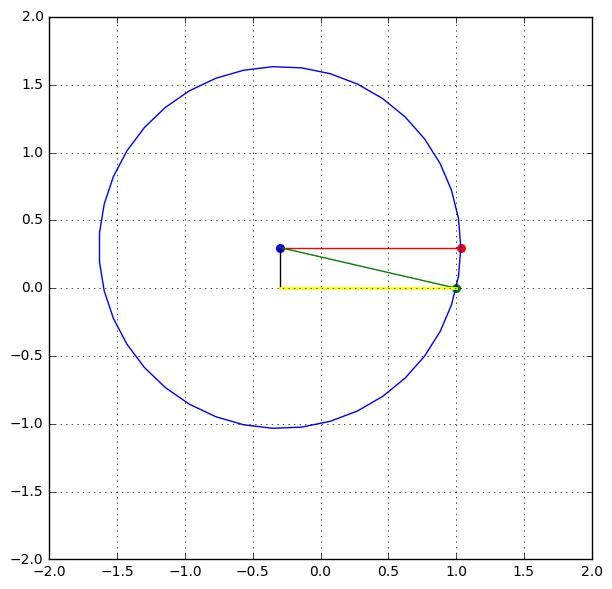

In [18]:
x,y=generate_circle(-0.3,0.3,(1.78)**0.5)
pyplot.figure(figsize=(7,7))
pyplot.grid(True)
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.plot(x,y)
pyplot.scatter(x[0],y[0],color='r',s=30)
pyplot.scatter(1,0,color='g',s=30)
pyplot.scatter(-0.3,0.3,color='b',s=30)
pyplot.plot(numpy.linspace(-0.3, 1.034, 10),0.3*numpy.ones(10),color='r')
pyplot.plot(numpy.linspace(-0.3,1,10),0.3-1*numpy.linspace(0,0.3,10),color='g')
pyplot.plot(numpy.zeros(10)-0.3,numpy.linspace(0,0.3,10),color='black')
pyplot.plot(numpy.linspace(-0.3,1,10),numpy.zeros(10),color='yellow',linewidth=2)

And the strength of the vortex is:$$\Gamma = 4\pi R u_\inf sin(\theta)$$

From the lessons we took, we know that:$$ Lift=\rho u_\inf \Gamma $$



Then, we can get the lift: $$Lift =4\pi \rho u_\inf ^2  y$$

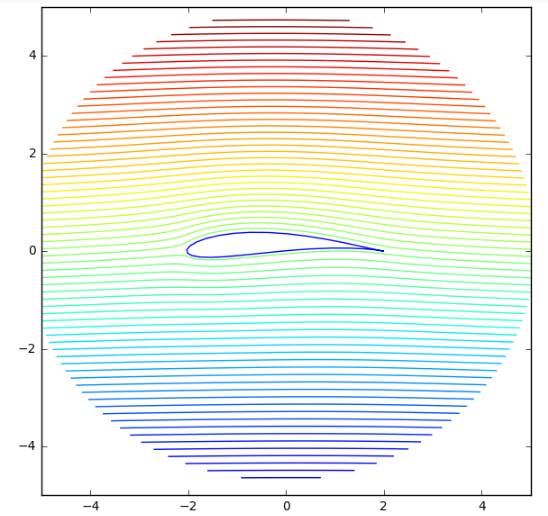

In [19]:
Image('./3.png',width=400,height=400)

Streamlines after we considered the Kutta condition

The equation above shows that if the value of the y coordinate becomes larger, the lift of the Joukowski airfoil will become larger as well. And from what we got in the first part of the report, we can tell that the upper surface of the airfoil will tends to be a circle very similar to the circle before transform, and the shape of the "airfoil" after the transform is very wierd and is not physical, which means that the Joukowski transformation will not work.

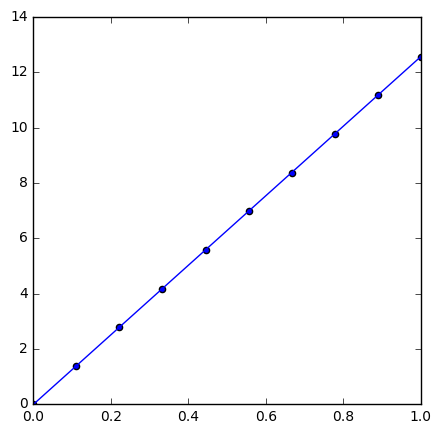

In [20]:
rho = 1
u_inf = 1
y=numpy.linspace(0,1,10)
lift= 4*math.pi*rho*u_inf**2*y
pyplot.figure(figsize=[5,5])
pyplot.xlim(0,1)
pyplot.ylim(0,14)
pyplot.scatter(y,lift)
pyplot.plot(y,lift)

The solution above seems ridiculous, but according to what we get in the previous part, if we increases the value of $y$ coordinate, the radius $R$ will also increase since we have to intersect with the point $(1,0)$. And from what we got in the first part of the report, we can tell that the upper surface of the airfoil will tends to be a circle very similar to the circle before transform, and the shape of the "airfoil" after the transform is very wierd and is not physical, which means that the Joukowski transformation will not work.

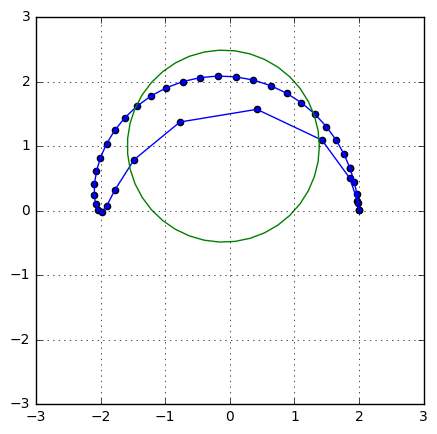

In [21]:
xc=-0.1
yc=1
r=((xc-1)**2 +yc**2)**0.5
x,y=generate_circle(xc,yc,r)
z=x+1j*y
z_t=j_trans(z,1)
pyplot.figure(figsize=[5,5])
pyplot.plot(z_t.real, z_t.imag)
pyplot.scatter(z_t.real, z_t.imag)

pyplot.plot(x,y)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)

The figure above is the transform result of the circle center at $(-0.1,1)$ with radius $\sqrt{2.21}$, the shape cannot be regarded as an airfoil anymore.

Another thing is that if the $y$ coordinates increases, the radius will increase too, that will also increase the cross section area of the airfoil, which means that the gravity of the airfoil will increase. Gravity is a body force, which means that in a 2D problem, the gravity is proportional to $y^2$, even if the lift is proportional to $y$, gravity will still increase faster than the lift. So the lift cannot goes to infinite.

### conclusion

1. The lift of the Joukowski airfoil has very large relation with the center's $y$ coordinates, within the certain range, the lift is proportional to the value of the $y$ coordinate.
2. If the value of the $y$ coordinate of the center becomes too large, the transform will not be a airfoil anymore.

## 4. Final Conclusion

In this project, we looked into details about how the Joukowski transformation transforms and their relationship with the lift. 

We first seperate the whole plane into 8 areas by a circle center at origin with radius 1, and we plot the transform result of those areas piece by piece. We found that points inside the circle has changed the sign of $y$, and were located more closely to the point $(-1,0)$ and $(1,0)$, and spreads to everywhere on the plane. However, for other areas, the change is not that obvious, and the transform result becomes smaller if the distance from the cirtain point to the origin point becomes larger.

In the second part, we looked at the result of transform of circles, we begin with three examples that we used in assignment 6, and then change the $x$ coordinate only, find out that the circle has to intersect with the point $(1,0)$. The other intersect point with the $x$ axis will form the leading edge. Then we change the $y$ coordinate, and keep the circle intersect with point $(1,0)$, and we find out that arc is getting larger when we increase the $y$ coordinate. But if the value becomes too large, the transform result will loose the shape of airfoil.

In the last part, we take the Kutta condition in to account, and derived a simple equatin of the lift force. The equation shows that the lift is proportional to the $y$ coordinate. But we didn't calculate the influence of the gravity, and when the radius becomes too big, thetransform result will loose its airfoil shape as well.

## Reference

1. Wikipedia: Joukowski transform 
   https://en.wikipedia.org/wiki/Joukowsky_transform
2. Joukowski Transform Module by John H. Mathews
   http://mathfaculty.fullerton.edu/mathews/c2003/JoukowskiTransMod.html
3. Joukowski Transform NASA Applet  Glenn Research Center
https://www.grc.nasa.gov/WWW/K-12/airplane/map.html

---

In [22]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()